In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
import os
import graphviz
import pydotplus
from sklearn import tree

In [2]:
os.environ['PATH'] += os.pathsep + r'C:\Program Files\graphviz-2.38\release\bin'

In [3]:
#conda install -c anaconda py-xgboost

In [4]:
data = pd.read_csv('./AdultDataset/adult.data')

In [5]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

# Description of the main variables in the dataset


1) age: continuous.
2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3) fnlwgt: continuous.
4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5) education-num: continuous.
6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10) sex: Female, Male.
11) capital-gain: continuous.
12) capital-loss: continuous.
13) hours-per-week: continuous.
14) native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Below, I insert the columns names

In [6]:
column_names= ['age',
               'workclass',
               'fnlwgt',
               'education',
               'education-num',
               'marital-status',
               'occupation',
               'relationship',
               'race',
               'sex',
               'capital-gain',
               'capital-loss',
               'hours-per-week',
               'native-country',
               'Salary'
              ]
df1 = pd.DataFrame(data.values, columns = column_names )


In [7]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## I remove education num, as It's gives me not additional information compared to Education column

In [8]:
del(df1['education-num'])

In [9]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Salary'],
      dtype='object')

In [10]:
df1.shape

(32560, 14)

In [11]:
df1.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

In [12]:
toBeStrip=['workclass','education','marital-status','occupation',
           'relationship','race','sex','native-country','Salary']
for elem in toBeStrip:
    df1[elem]=df1[elem].str.strip()

# Studying Single attributes

In [13]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Salary'],
      dtype='object')

## Age

In [14]:
print("The Minimum Age is: ", df1['age'].min(),";", 
      "The maximum age is: ", df1['age'].max(),";",
      "The average age is: ", df1['age'].mean(),";",
      "The mode age is: ", df1['age'].mode())

The Minimum Age is:  17 ; The maximum age is:  90 ; The average age is:  38.581633906633904 ; The mode age is:  0    36
dtype: object


In [15]:
df1[df1['age']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

In [16]:
from collections import Counter
l=[]
for elem in df1['age']:
    l.append(elem)
#Counter(l)

* I can create 4-5 variable for the attribute Age: <20; >20<40; >40<60; >60<80; >80

## workclass

In [17]:
df1['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df1[df1['workclass']=='?'].any()

age               True
workclass         True
fnlwgt            True
education         True
marital-status    True
occupation        True
relationship      True
race              True
sex               True
capital-gain      True
capital-loss      True
hours-per-week    True
native-country    True
Salary            True
dtype: bool

* What can I do with "Without pay" and "Never Worked?" Moreover I have to remove rows with "?"

## Education

In [19]:
df1['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

* It has to be reduced the number of levels of instruction classes


In [20]:
df1[df1['education']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

## Marital Status

In [21]:
df1['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

* Should I eliminate "married spouse absent" and "married af spouse?"

In [22]:
df1[df1['marital-status']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

## Occupation

In [23]:
df1['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df1['occupation'].value_counts().shape[0]

15

* I can remove "Armed-Forces" and "?"

In [25]:
df1[df1['occupation']=='?'].any()

age               True
workclass         True
fnlwgt            True
education         True
marital-status    True
occupation        True
relationship      True
race              True
sex               True
capital-gain      True
capital-loss      True
hours-per-week    True
native-country    True
Salary            True
dtype: bool

## relationship

In [26]:
df1['relationship'].value_counts()

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [27]:
df1[df1['relationship']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

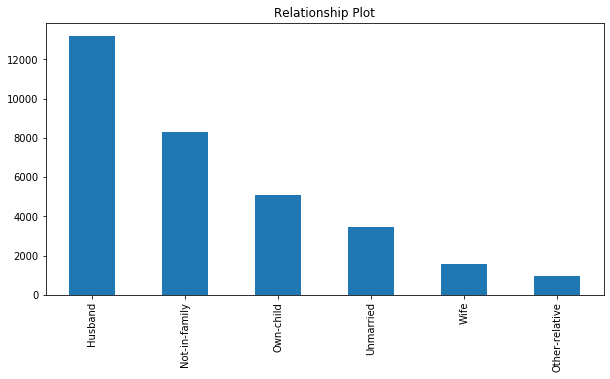

In [28]:
RelationshipPlot=df1['relationship'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Relationship Plot")

## race

In [29]:
df1['race'].value_counts()

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [30]:
df1[df1['race']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

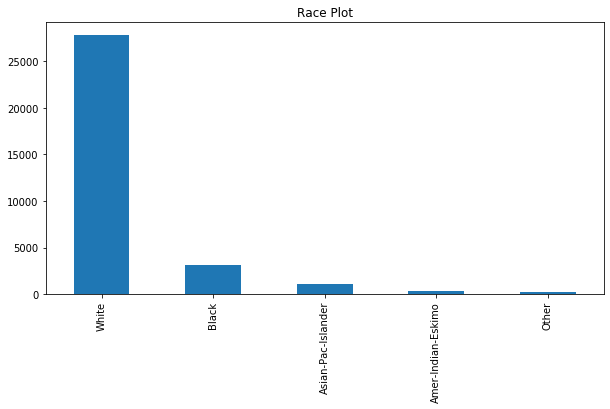

In [31]:
RacePlot=df1['race'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Race Plot")

## Sex

In [32]:
df1['sex'].value_counts()

Male      21789
Female    10771
Name: sex, dtype: int64

In [33]:
df1[df1['sex']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

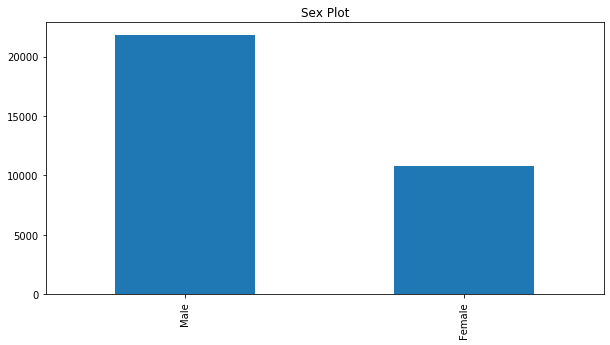

In [34]:
SexPlot=df1['sex'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Sex Plot")

## capital-gain & Capital loss


In [35]:
df1['capital-gain'].value_counts()[:5]

0        29849
15024      347
7688       284
7298       246
99999      159
Name: capital-gain, dtype: int64

In [36]:
df1['capital-loss'].value_counts()[:5]

0       31041
1902      202
1977      168
1887      159
1485       51
Name: capital-loss, dtype: int64

In [37]:
df1[df1['capital-loss']==0].shape[0]

31041

In [38]:
df1[df1['capital-gain']==0].shape[0]

29849

* Probably Both to be removed

## hours-per-week

In [39]:
df1['hours-per-week'].value_counts()[:5]

40    15216
50     2819
45     1824
60     1475
35     1297
Name: hours-per-week, dtype: int64

In [40]:
df1['hours-per-week'].min()

1

In [41]:
df1['hours-per-week'].max()

99

In [42]:
df1['hours-per-week'].mean()

40.437469287469284

In [43]:
df1['hours-per-week'].mode()

0    40
dtype: object

* This variable has to be arranged

In [44]:
df1[df1['hours-per-week']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

## Native-Country

In [45]:
df1['native-country'].value_counts()[:10]

United-States    29169
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
Name: native-country, dtype: int64

* Devo creare variabile others

In [46]:
df1[df1['native-country']=='?'].any()

age               True
workclass         True
fnlwgt            True
education         True
marital-status    True
occupation        True
relationship      True
race              True
sex               True
capital-gain      True
capital-loss      True
hours-per-week    True
native-country    True
Salary            True
dtype: bool

## Salary

In [47]:
df1['Salary'].value_counts()

<=50K    24719
>50K      7841
Name: Salary, dtype: int64

In [48]:
df1[df1['Salary']=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Salary            False
dtype: bool

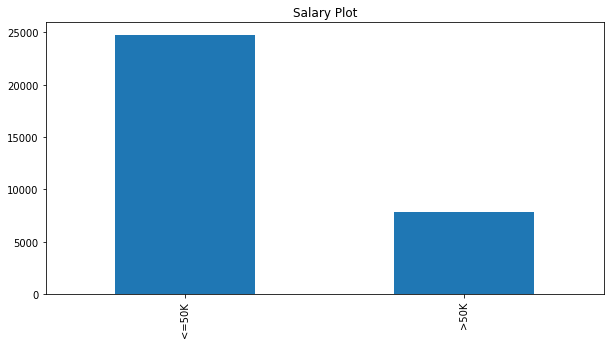

In [49]:
SalaryPlot=df1['Salary'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Salary Plot")

### ------------------------------------------------------------------------------------------------------------
### ------------------------------------------------------------------------------------------------------------

# To do

## 1. Convert Unknown to "?" and eliminate it

In [50]:
beforeRows = df1.shape[0]
print(beforeRows)

32560


# I eliminate all the rows in which there is at least a missing value in a certain attribute

### Thanks to the prior analysis i know that missing values are in theese three instances: 1) workclass; 2) occupation; 3) native-country

## First Filter

In [51]:
df1=df1[df1['workclass']!="?"]

In [52]:
df1.shape

(30724, 14)

## Second Filter

In [53]:
df1[df1['occupation']=='?'].any()

age                True
workclass          True
fnlwgt             True
education          True
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week     True
native-country     True
Salary             True
dtype: bool

In [54]:
df1=df1[df1['occupation']!="?"]

In [55]:
df1.shape

(30717, 14)

## Third Filter

In [56]:
df1=df1[df1['native-country']!="?"]

In [57]:
df1.shape

(30161, 14)

## Here the remaining columns

In [58]:
afterRows = df1.shape[0]
print(afterRows)

30161


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows dropped due to cleaning?<br><br></p>


In [59]:
beforeRows - afterRows

2399

In [60]:
df1[:1]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Generic code to make discrete all the cotinuous variables

### Age

In [61]:
l_age=[]
for elem in df1['age']:
    if elem <20:
        l_age.append('<20')
    elif elem >20 and elem <40:
        l_age.append('>20 & <40')
    elif elem >40 and elem <60:
        l_age.append('>40 & <60')
    elif elem >60 and elem <80:
        l_age.append('>60 & <80')
    else:
        l_age.append('>80')

In [62]:
df1['l_age']=l_age

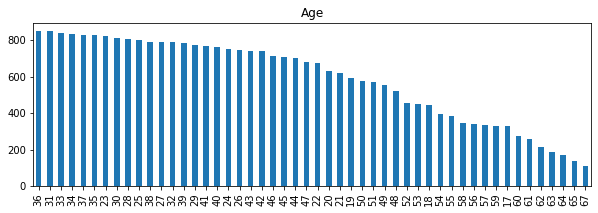

In [63]:
AgePlot=df1['age'].sort_values().value_counts()[:50].plot.bar(figsize=(10,3),x='Value', title="Age")

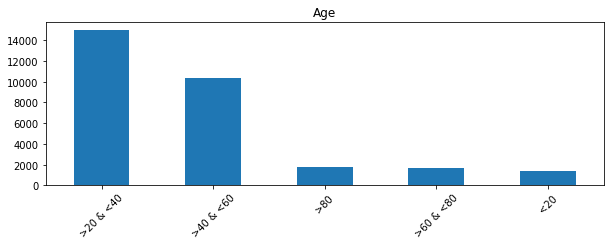

In [64]:
AgePlot=df1['l_age'].sort_values().value_counts().plot.bar(figsize=(10,3),x='Value', title="Age")
plt.xticks(rotation=45)
plt.show()

### Workclass

In [65]:
RemoveLowCountInstancesCond1=df1['workclass']!="Never-worked"
RemoveLowCountInstancesCond2=df1['workclass']!="Without-pay"

In [66]:
df1=df1[RemoveLowCountInstancesCond1 & RemoveLowCountInstancesCond2]

In [67]:
df1.shape

(30147, 15)

## Education

In [68]:
df1['education'].value_counts()

HS-grad         9831
Some-college    6675
Bachelors       5043
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1007
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [69]:
l_education=[]
for elem in df1['education']:
    if elem =="Preschool" or elem =="1st-4th"or elem =="5th-6th":
        l_education.append("Elementary school")
    elif elem =="7th-8th" or  elem =="9th" or elem =="10th" or elem =="11th" or elem =="12th":
        l_education.append("HS-Grad_NotCompleted")
    elif elem =="Assoc-voc" or elem =="Assoc-acdm":
        l_education.append("Assoc-acdm_or_Voc")
    else:
        l_education.append(elem)

In [70]:
df1['l_education']=l_education

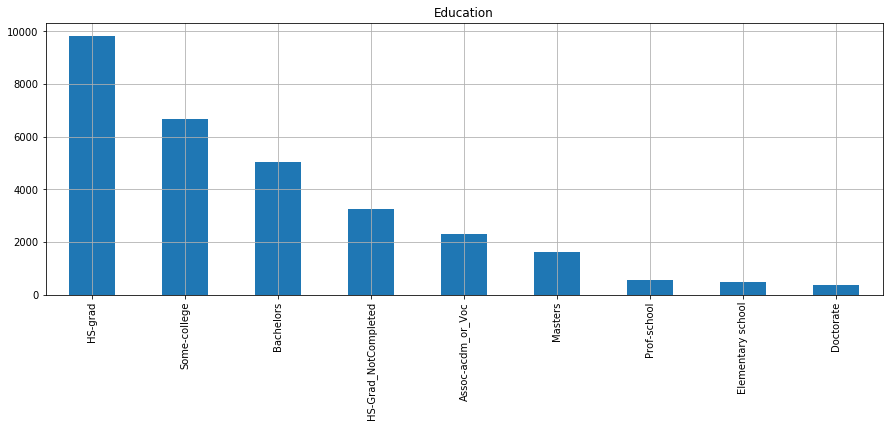

In [71]:
EducationPlot=df1['l_education'].sort_values().value_counts().plot.bar(figsize=(15,5),x='Value', title="Education", grid=True)

## Marital Status

In [72]:
df1['marital-status'].value_counts()

Married-civ-spouse       14057
Never-married             9721
Divorced                  4214
Separated                  939
Widowed                    826
Married-spouse-absent      369
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [73]:
MaritalStatusToBeRemoved=df1['marital-status']!="Married-AF-spouse"

In [74]:
df1=df1[MaritalStatusToBeRemoved]

In [75]:
df1.shape

(30126, 16)

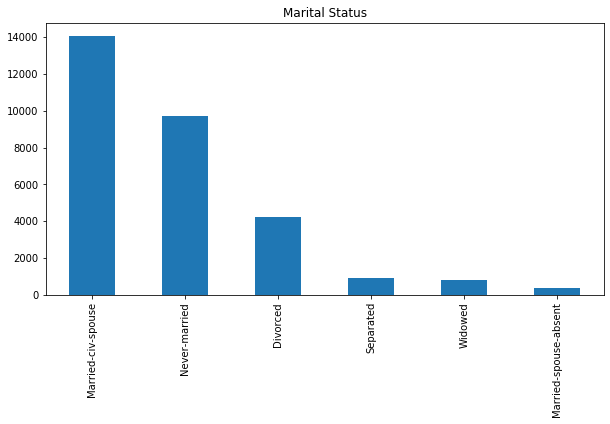

In [76]:
HoursPerWeekPlot=df1['marital-status'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Marital Status")

## Occupation

In [77]:
df1['occupation'].value_counts()

Prof-specialty       4035
Craft-repair         4026
Exec-managerial      3991
Adm-clerical         3712
Sales                3582
Other-service        3207
Machine-op-inspct    1965
Transport-moving     1570
Handlers-cleaners    1349
Farming-fishing       982
Tech-support          912
Protective-serv       643
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

## I decided to remove Armed Forces.

In [78]:
df1=df1[df1['occupation']!='Armed-Forces']

In [79]:
df1['occupation'].value_counts()

Prof-specialty       4035
Craft-repair         4026
Exec-managerial      3991
Adm-clerical         3712
Sales                3582
Other-service        3207
Machine-op-inspct    1965
Transport-moving     1570
Handlers-cleaners    1349
Farming-fishing       982
Tech-support          912
Protective-serv       643
Priv-house-serv       143
Name: occupation, dtype: int64

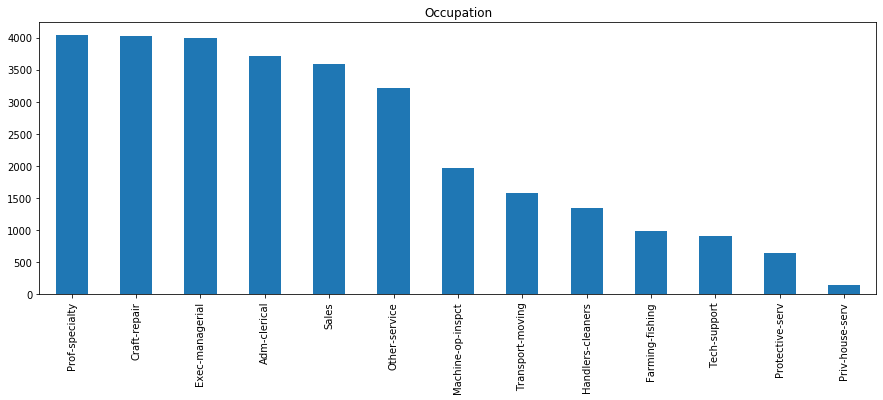

In [80]:
OccupationPlot=df1['occupation'].sort_values().value_counts().plot.bar(figsize=(15,5),x='Value', title="Occupation")

## Hours per Week

In [81]:
df1['hours-per-week'].sort_values().value_counts()[:20]

40    14234
50     2713
45     1753
60     1403
35     1184
20     1052
30      988
55      670
25      570
48      493
38      455
15      346
70      276
65      240
32      238
10      220
24      217
42      212
44      208
36      202
Name: hours-per-week, dtype: int64

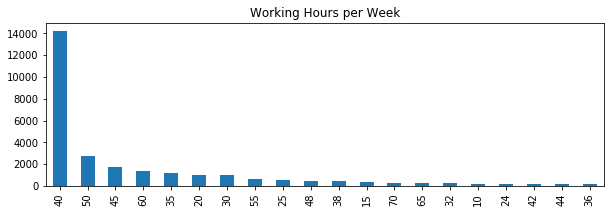

In [82]:
HoursPerWeekPlot=df1['hours-per-week'].sort_values().value_counts()[:20].plot.bar(figsize=(10,3),x='Value', title="Working Hours per Week")

In [83]:
l_HoursPerWeek=[]
for elem in df1['hours-per-week']:
    if elem <38:
        l_HoursPerWeek.append("Lower than 38 Hours")
    elif elem >=38 and elem <42:
        l_HoursPerWeek.append(">=38 & <42")
    
    elif elem >=42 and elem <50:
        l_HoursPerWeek.append(">=42 & <50")
    else:
        l_HoursPerWeek.append("Higher than 50 Hours")        

In [84]:
df1['l_HoursPerWeek']=l_HoursPerWeek

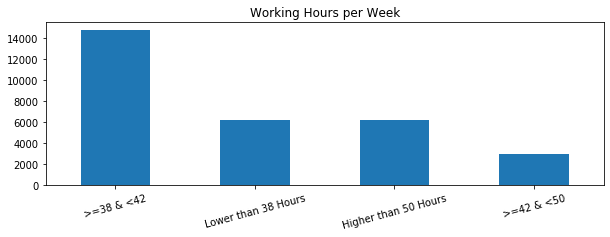

In [85]:
HoursPerWeekPlotDiscrete=df1['l_HoursPerWeek'].sort_values().value_counts().plot.bar(figsize=(10,3),x='Value', title="Working Hours per Week")
plt.xticks(rotation=15)
plt.show()

## Native Country

In [86]:
df1['native-country'].value_counts()[:10]

United-States    27460
Mexico             610
Philippines        187
Germany            128
Puerto-Rico        109
Canada             107
India              100
El-Salvador        100
Cuba                92
England             86
Name: native-country, dtype: int64

### I decided to group in Others all the countries whose observations are lower than 100

In [87]:
l_Country=[]
for elem in df1['native-country']:
    if elem =='United-States':
        l_Country.append(elem)
    else:
        l_Country.append('Others')

In [88]:
df1['l_Country']=l_Country

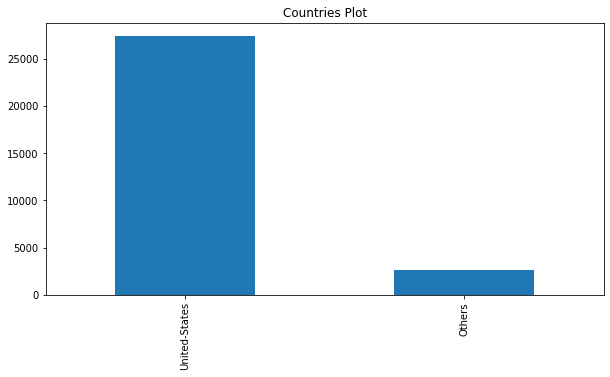

In [89]:
Country_Plot=df1['l_Country'].sort_values().value_counts().plot.bar(figsize=(10,5),x='Value', title="Countries Plot")

### ----------------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------------

In [90]:
df1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary,l_age,l_education,l_HoursPerWeek,l_Country
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,>40 & <60,Bachelors,Lower than 38 Hours,United-States
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,>20 & <40,HS-grad,>=38 & <42,United-States
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,>40 & <60,HS-Grad_NotCompleted,>=38 & <42,United-States
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,>20 & <40,Bachelors,>=38 & <42,Others
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,>20 & <40,Masters,>=38 & <42,United-States


In [91]:
CleanData=['l_age','workclass','l_education','marital-status','occupation','relationship','race','sex','l_Country','Salary']

In [92]:
df2=df1[CleanData]

In [93]:
df2[:2]

,l_age,workclass,l_education,marital-status,occupation,relationship,race,sex,l_Country,Salary
0,>40 & <60,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,>20 & <40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


## Latest Check on the content of the attributes

In [94]:
df2['l_age'].value_counts()

>20 & <40    14969
>40 & <60    10315
>80           1760
>60 & <80     1708
<20           1365
Name: l_age, dtype: int64

In [95]:
df2['workclass'].value_counts()

Private             22271
Self-emp-not-inc     2497
Local-gov            2067
State-gov            1277
Self-emp-inc         1074
Federal-gov           931
Name: workclass, dtype: int64

In [96]:
df2['l_education'].value_counts()

HS-grad                 9815
Some-college            6670
Bachelors               5038
HS-Grad_NotCompleted    3255
Assoc-acdm_or_Voc       2312
Masters                 1626
Prof-school              542
Elementary school        484
Doctorate                375
Name: l_education, dtype: int64

In [97]:
df2['marital-status'].value_counts()

Married-civ-spouse       14054
Never-married             9715
Divorced                  4214
Separated                  939
Widowed                    826
Married-spouse-absent      369
Name: marital-status, dtype: int64

In [98]:
df2['occupation'].value_counts()

Prof-specialty       4035
Craft-repair         4026
Exec-managerial      3991
Adm-clerical         3712
Sales                3582
Other-service        3207
Machine-op-inspct    1965
Transport-moving     1570
Handlers-cleaners    1349
Farming-fishing       982
Tech-support          912
Protective-serv       643
Priv-house-serv       143
Name: occupation, dtype: int64

In [99]:
df2['relationship'].value_counts()

Husband           12448
Not-in-family      7721
Own-child          4459
Unmarried          3210
Wife               1393
Other-relative      886
Name: relationship, dtype: int64

In [100]:
df2['race'].value_counts()

White                 25893
Black                  2814
Asian-Pac-Islander      894
Amer-Indian-Eskimo      285
Other                   231
Name: race, dtype: int64

In [101]:
df2['sex'].value_counts()

Male      20352
Female     9765
Name: sex, dtype: int64

In [102]:
df2['l_Country'].value_counts()

United-States    27460
Others            2657
Name: l_Country, dtype: int64

In [103]:
df2['Salary'].value_counts()

<=50K    22620
>50K      7497
Name: Salary, dtype: int64

# It seems to be good. Now we can start with the classification activities

In [104]:
df2[-2:]

,l_age,workclass,l_education,marital-status,occupation,relationship,race,sex,l_Country,Salary
32558,>20 & <40,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K
32559,>40 & <60,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,>50K


### Now, I need to encode correctly my dataset

In [105]:
le = preprocessing.LabelEncoder()
df3 = df2.apply(le.fit_transform)

In [106]:
df3[:20]

,l_age,workclass,l_education,marital-status,occupation,relationship,race,sex,l_Country,Salary
0,2,4,1,1,2,0,4,1,1,0
1,1,2,5,0,4,1,4,1,1,0
2,2,2,4,1,4,0,2,1,1,0
3,1,2,1,1,8,5,2,0,0,0
4,1,2,6,1,2,5,4,0,1,0
5,2,2,4,2,6,1,2,0,0,0
6,2,4,5,1,2,0,4,1,1,1
7,1,2,6,3,8,1,4,0,1,1
8,2,2,1,1,2,0,4,1,1,1
9,1,2,8,1,2,0,2,1,1,1


* I create my target Variable

In [107]:
y=df3[['Salary']].copy()
y

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [108]:
X=df3.iloc[:,0:9]

In [109]:
X.columns

Index(['l_age', 'workclass', 'l_education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'l_Country'],
      dtype='object')

## Training Phase

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [111]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()
#X_test.describe()

In [112]:
IncomeClassifier = DecisionTreeClassifier(random_state=0,max_leaf_nodes=20)
IncomeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [113]:
type(IncomeClassifier)

sklearn.tree.tree.DecisionTreeClassifier

In [114]:
print(IncomeClassifier.feature_importances_)

[0.03562728 0.00585681 0.28184603 0.         0.05089583 0.62577404
 0.         0.         0.        ]


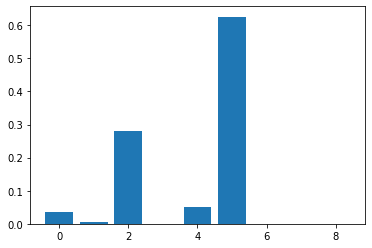

In [115]:
pyplot.bar(range(len(IncomeClassifier.feature_importances_)), IncomeClassifier.feature_importances_)
pyplot.show()

In [116]:
names=X.columns

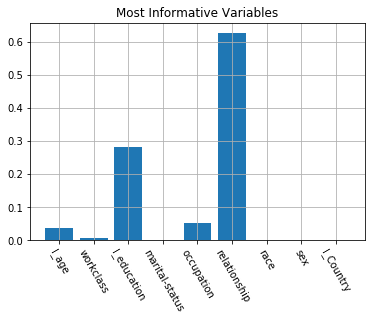

In [117]:
pyplot.bar(range(len(IncomeClassifier.feature_importances_)), IncomeClassifier.feature_importances_)
pyplot.xticks(range(X.shape[1]), names, rotation=-60)
pyplot.title('Most Informative Variables')
pyplot.grid(True)
pyplot.show()

# I print the decision tree


In [118]:
dot_data = tree.export_graphviz(IncomeClassifier, out_file=None,filled = True,feature_names=names,class_names=df2['Salary'].unique())
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"10,10!"')
pydot_graph.write_png('resized_tree.png')

True

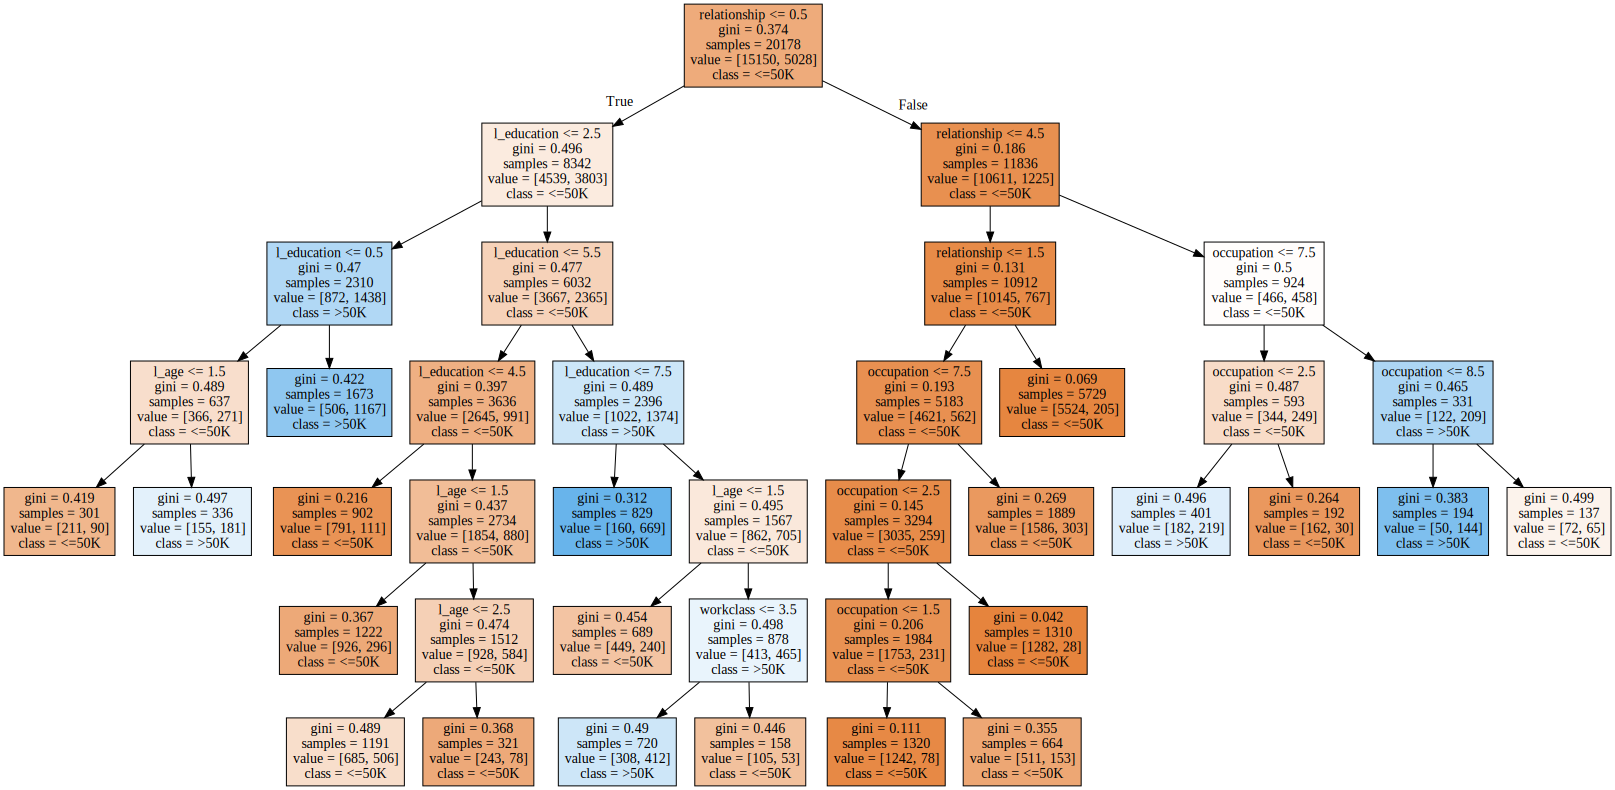

In [119]:
graph


## Prediction on Test Set 

In [120]:
predictions = IncomeClassifier.predict(X_test)

In [121]:
predictions[-20:]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
y_test['Salary'][-20:]

3322     0
31131    0
19679    0
8480     0
9506     0
23265    1
17814    0
7524     0
24188    0
18555    0
994      1
2116     0
22198    0
6641     0
27912    0
5270     0
27457    1
28073    0
6593     0
18715    0
Name: Salary, dtype: int32

## Measure of accuracy

In [123]:
accuracy_score(y_true = y_test,
               y_pred = predictions)

0.820303853506389